# Sign Language Classification

In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = Path("./")

In [3]:
path.ls()

[WindowsPath('.ipynb_checkpoints'),
 WindowsPath('data'),
 WindowsPath('Sign-Language-Classification.ipynb'),
 WindowsPath('sign-language-digits-dataset.zip')]

In [4]:
X = np.load(path/'data'/'X.npy')
y = np.load(path/'data'/'Y.npy')

In [5]:
X.shape, y.shape

((2062, 64, 64), (2062, 10))

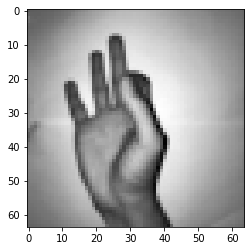

In [6]:
plt.imshow(X[0].reshape((64,64)), cmap='gray')

In [7]:
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
# from 204 to 408 is zero and count is 205
# from 822 to 1027 is one and count is 206
# from 1649 to 1854 is two and count is 206
# from 1443 to 1648 is three and count is 206
# from 1236 to 1442 is four and count is 207
# from 1855 to 2061 is five and count is 207 
# from 615 to 821 is six and count is 207
# from 409 to 614 is seven and count is 206
# from 1028 to 1235 is eight and count is 208
# from 0 to 203 is nine number is 204

In [57]:
Y = np.zeros(X.shape[0])
Y[:204] = 9; Y[204:409] = 0; Y[409:615] = 7; Y[615:822] = 6; Y[822:1028] = 1; Y[1028:1236] = 8; Y[1236:1443] = 4; 
Y[1443:1649] = 3; Y[1649:1855] = 2; Y[1855:] = 5

In [58]:
Y.shape, Y[0]

((2062,), 9.0)

In [59]:
Y

array([9., 9., 9., 9., ..., 5., 5., 5., 5.])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = X.reshape((2062, 64*64))
X.shape

(2062, 4096)

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=8)

In [63]:
Y_train.min(), Y_train.max()

(0.0, 9.0)

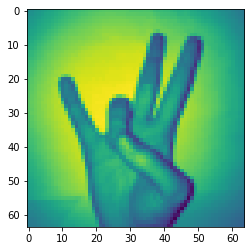

In [64]:
plt.imshow(X_train[0].reshape((64,64)))

In [65]:
Y_train[0]

7.0

In [66]:
X_train, Y_train, X_test, Y_test = map(torch.tensor, (X_train, Y_train, X_test, Y_test))
n,c = X_train.shape
X_train.shape, Y_train.min(), Y_train.max()

(torch.Size([1649, 4096]),
 tensor(0., dtype=torch.float64),
 tensor(9., dtype=torch.float64))

In [67]:
X_train.shape

torch.Size([1649, 4096])

In [109]:
bs=1
train_ds = TensorDataset(X_train, Y_train.float())
valid_ds = TensorDataset(X_test, Y_test.float())
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [119]:
loss_func = nn.CrossEntropyLoss()

In [111]:
class Sign_Language_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(4096, 728, bias=True)
        self.lin2 = nn.Linear(728, 50, bias=True)
        self.lin3 = nn.Linear(50, 10, bias=True)

    def forward(self, xb):
        x = self.lin1(xb)
        x = F.relu(x)
        x = self.lin2(x)
        x = F.relu(x)
        return self.lin3(x)

In [112]:
learn = Learner(data, Sign_Language_NN(), loss_func=loss_func, metrics=accuracy)

In [118]:
learn.fit_one_cycle(10, 1)

epoch,train_loss,valid_loss,accuracy,time
0,10.215367,8.498056,0.092010,00:18
1,9.440566,10.611936,0.092010,00:17
2,9.755267,10.753008,0.092010,00:17
3,9.014076,9.309931,0.092010,00:17
4,10.324163,9.301950,0.092010,00:17
5,8.954322,8.512518,0.092010,00:17
6,9.861778,8.380605,0.092010,00:17
7,9.574949,8.384700,0.092010,00:18
8,8.493198,8.438026,0.092010,00:17
9,8.481236,8.403987,0.092010,00:17


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


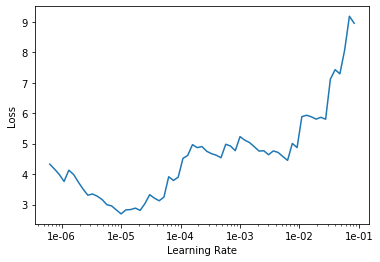

In [114]:
learn.lr_find()
learn.recorder.plot()

In [116]:
learn.fit_one_cycle(2, slice(1e-5, 1e-4))

ZeroDivisionError: division by zero